<a href="https://colab.research.google.com/github/akhilvallala/First_Project/blob/master/Loan_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import f_regression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import RandomizedSearchCV 
from sklearn.model_selection import cross_val_score

In [ ]:
df_train = pd.read_csv('train_ctrUa4K.csv')
df_test = pd.read_csv('test_lAUu6dG.csv')

In [ ]:
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
train_original = df_train.copy()
test_original = df_test.copy()

In [ ]:
df_train["Loan_Status"].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

Univarient analysis

caterogical

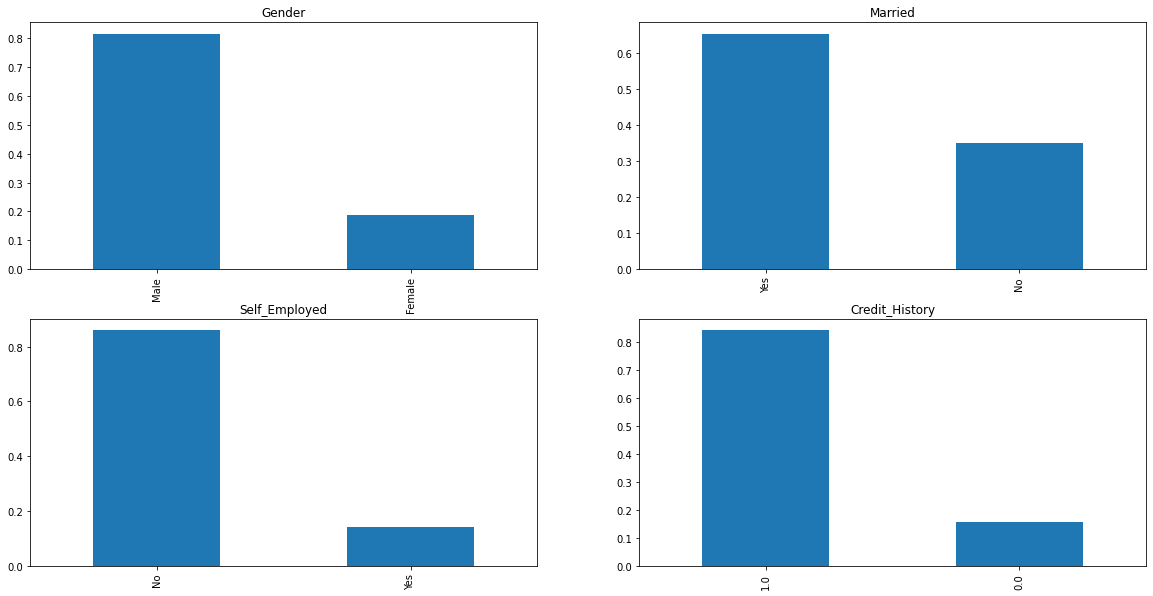

In [ ]:
plt.figure(1)
plt.subplot(221)
df_train["Gender"].value_counts(normalize=True).plot.bar(figsize=(20,10),title="Gender")
plt.subplot(222)
df_train["Married"].value_counts(normalize=True).plot.bar(figsize=(20,10),title="Married")
plt.subplot(223)
df_train["Self_Employed"].value_counts(normalize=True).plot.bar(figsize=(20,10),title="Self_Employed")
plt.subplot(224)
df_train["Credit_History"].value_counts(normalize=True).plot.bar(figsize=(20,10),title="Credit_History")

Ordinal

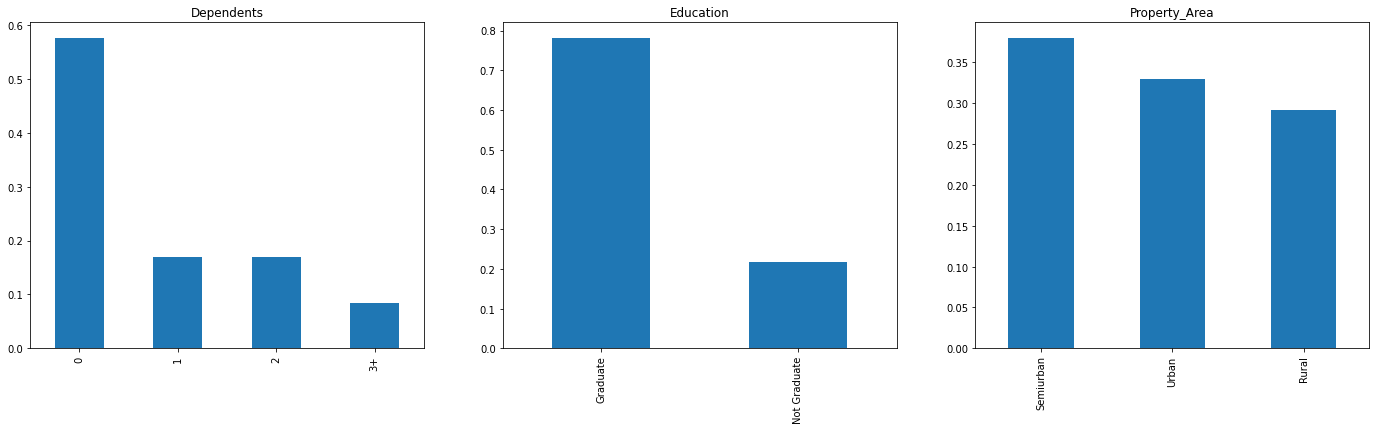

In [ ]:
plt.figure(1)
plt.subplot(131)
df_train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6), title="Dependents")
plt.subplot(132)
df_train['Education'].value_counts(normalize=True).plot.bar(figsize=(24,6), title="Education")
plt.subplot(133)
df_train['Property_Area'].value_counts(normalize=True).plot.bar(figsize=(24,6), title="Property_Area")
plt.show()

Numerical

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


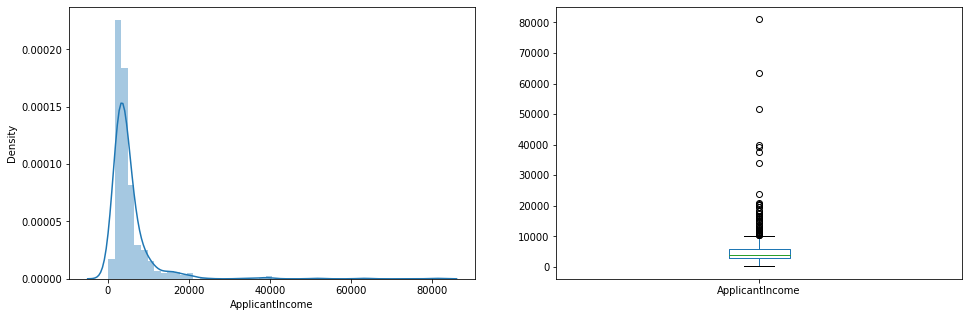

In [ ]:
plt.figure(1)
plt.subplot(121)
sns.distplot(df_train["ApplicantIncome"]);
plt.subplot(122)
df_train["ApplicantIncome"].plot.box(figsize=(16,5))
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


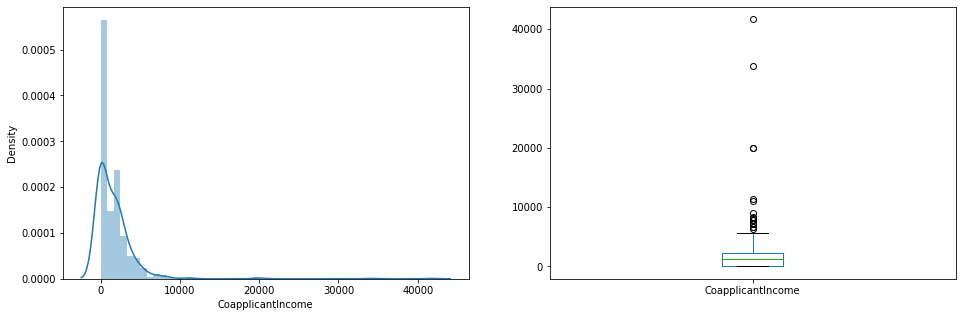

In [ ]:
plt.figure(1)
plt.subplot(121)
sns.distplot(df_train["CoapplicantIncome"]);
plt.subplot(122)
df_train["CoapplicantIncome"].plot.box(figsize=(16,5))
plt.show()

In [ ]:
df_train["LoanAmount"].isnull().sum()

22

In [ ]:
df_train['LoanAmount'].fillna(df_train['LoanAmount'].median(),inplace = True)

In [ ]:
df_train["LoanAmount"].isnull().sum()

0

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


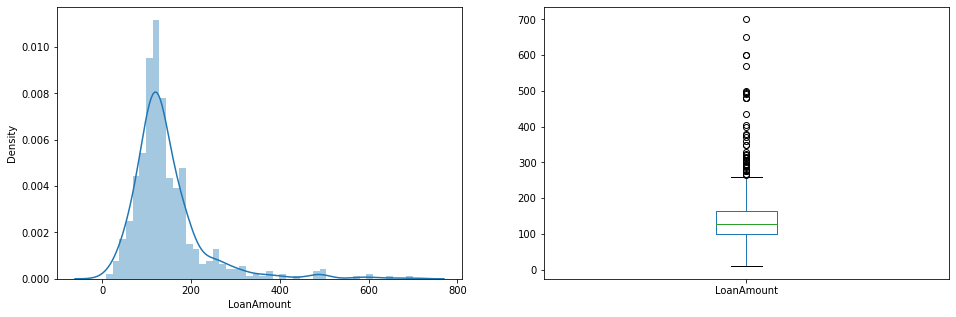

In [ ]:
plt.figure(1)
plt.subplot(121)
sns.distplot(df_train["LoanAmount"]);
plt.subplot(122)
df_train["LoanAmount"].plot.box(figsize=(16,5))
plt.show()

Bivarient Analysis

Categorical Independent variables vs Target variable

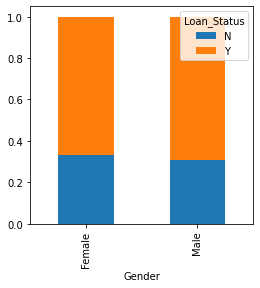

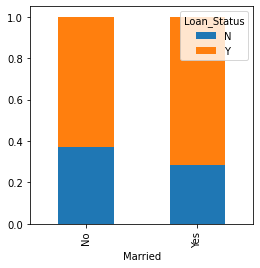

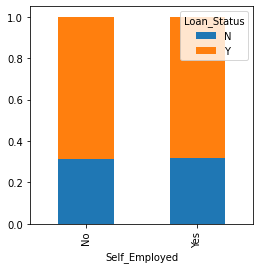

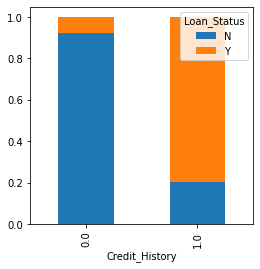

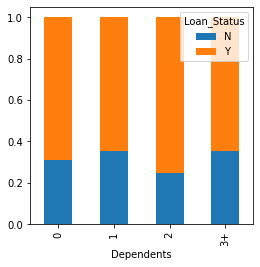

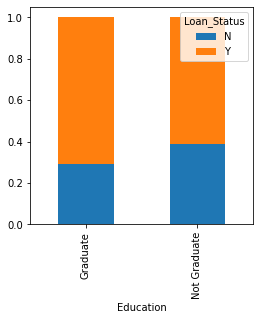

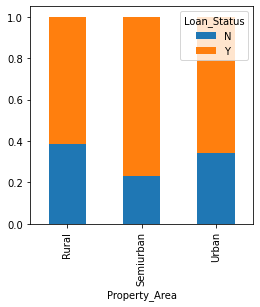

In [ ]:
Gender = pd.crosstab(df_train['Gender'],df_train['Loan_Status'])
Married = pd.crosstab(df_train['Married'],df_train['Loan_Status'])
Self_Employed = pd.crosstab(df_train['Self_Employed'],df_train['Loan_Status'])
Credit_History = pd.crosstab(df_train['Credit_History'],df_train['Loan_Status'])
Dependents = pd.crosstab(df_train['Dependents'],df_train['Loan_Status'])
Education = pd.crosstab(df_train['Education'],df_train['Loan_Status'])
Property_Area = pd.crosstab(df_train['Property_Area'],df_train['Loan_Status'])

Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()
Married.div(Married.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()
Self_Employed.div(Self_Employed.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()
Credit_History.div(Credit_History.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()
Dependents.div(Dependents.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()
Education.div(Education.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()
Property_Area.div(Property_Area.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()

Numerical variables vs target variables

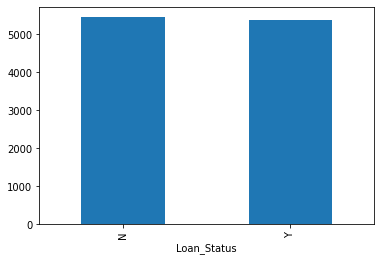

In [ ]:
df_train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

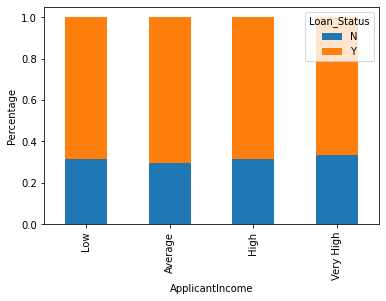

In [ ]:
bins = [0,2500,4000,6000,81000]
group = ['Low','Average','High','Very High']
df_train['Income_bin'] = pd.cut(df_train['ApplicantIncome'],bins,labels=group)

Income_bin = pd.crosstab(df_train['Income_bin'],df_train['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.xlabel('ApplicantIncome')
P = plt.ylabel('Percentage')

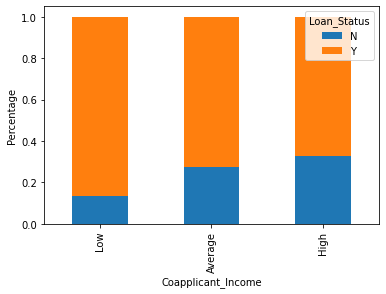

In [ ]:
bins = [0,1000,3000,42000]
group = ['Low','Average','High']
df_train['Coapplicant_Income_bin'] = pd.cut(df_train['CoapplicantIncome'],bins,labels=group)

Coapplicant_Income_bin = pd.crosstab(df_train['Coapplicant_Income_bin'],df_train['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.xlabel('Coapplicant_Income')
P = plt.ylabel('Percentage')

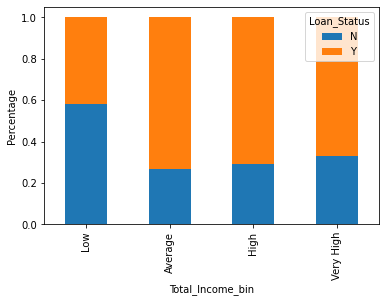

In [ ]:
df_train['Total_Income'] = df_train['ApplicantIncome']+df_train['CoapplicantIncome']
bins = [0,2500,4000,6000,81000]
group = ['Low','Average','High','Very High']
df_train['Total_Income_bin'] = pd.cut(df_train['Total_Income'],bins,labels=group)

Total_Income_bin = pd.crosstab(df_train['Total_Income_bin'],df_train['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.xlabel('Total_Income_bin')
P = plt.ylabel('Percentage')

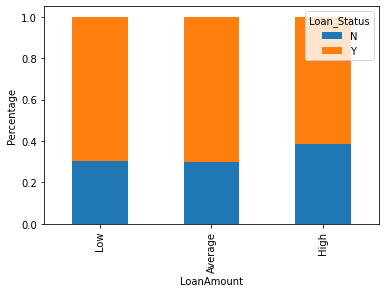

In [ ]:
bins = [0,100,200,700]
group = ['Low','Average','High']
df_train['LoanAmount_bin'] = pd.cut(df_train['LoanAmount'],bins,labels=group)

LoanAmount_bin = pd.crosstab(df_train['LoanAmount_bin'],df_train['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.xlabel('LoanAmount')
P = plt.ylabel('Percentage')

In [ ]:
df_train.drop(['Income_bin','Coapplicant_Income_bin','Total_Income_bin','LoanAmount_bin','Total_Income'],axis=1,inplace=True)

In [ ]:
df_train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

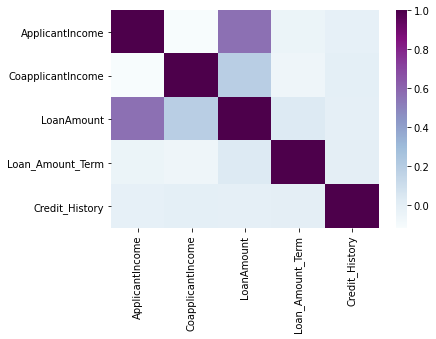

In [ ]:
matrix = df_train.corr()
sns.heatmap(matrix,cmap='BuPu')

Imputation:

In [ ]:
df_train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
#Categorical data
df_train['Gender'].fillna(df_train['Gender'].mode()[0],inplace= True)
df_train['Married'].fillna(df_train['Married'].mode()[0],inplace= True)
df_train['Dependents'].fillna(df_train['Dependents'].mode()[0],inplace= True)
df_train['Self_Employed'].fillna(df_train['Self_Employed'].mode()[0],inplace= True)
df_train['Credit_History'].fillna(df_train['Credit_History'].mode()[0],inplace= True)
df_train['Loan_Amount_Term'].fillna(df_train['Loan_Amount_Term'].mode()[0],inplace= True)

In [ ]:
df_train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Outlier detection

In [ ]:
df_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


Creating a new feature montly_pay: It contains payment from customer per month to the bank

In [ ]:
df_train['Monthly_pay'] = ((df_train['LoanAmount']*1000)/df_train['Loan_Amount_Term'])

Creating a new feature monthly_pay_percentage_per_Applicant_Income

In [ ]:
df_train["monthly_pay_per_Applicant_Income"] = (df_train["Monthly_pay"]/df_train["ApplicantIncome"])*100

In [ ]:
min_thershold, max_thershold = df_train.monthly_pay_per_Applicant_Income.quantile([0.01,0.999])
min_thershold

1.3096494934799099

In [ ]:
max_thershold

334.13942307693554

We can keep max thershlod for monthly_pay_per_Applicant_Income 20 or 25 Since, It is diffcult for applicant to pay the laon ammount per month

In [ ]:
df_train[df_train.monthly_pay_per_Applicant_Income>25].head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Monthly_pay,monthly_pay_per_Applicant_Income
62,LP001207,Male,Yes,0,Not Graduate,Yes,2609,3449.0,165.0,180.0,0.0,Rural,N,916.666667,35.134790
68,LP001238,Male,Yes,3+,Not Graduate,Yes,7100,0.0,125.0,60.0,1.0,Urban,Y,2083.333333,29.342723
77,LP001259,Male,Yes,1,Graduate,Yes,1000,3022.0,110.0,360.0,1.0,Urban,N,305.555556,30.555556
82,LP001267,Female,Yes,2,Graduate,No,1378,1881.0,167.0,360.0,1.0,Urban,N,463.888889,33.663925
188,LP001644,Male,Yes,0,Graduate,Yes,674,5296.0,168.0,360.0,1.0,Rural,Y,466.666667,69.238378


In [ ]:
df_train[df_train.monthly_pay_per_Applicant_Income>25].shape

(25, 15)

In [ ]:
df_train[df_train.monthly_pay_per_Applicant_Income<min_thershold]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Monthly_pay,monthly_pay_per_Applicant_Income
146,LP001516,Female,Yes,2,Graduate,No,14866,0.0,70.0,360.0,1.0,Urban,Y,194.444444,1.307981
185,LP001640,Male,Yes,0,Graduate,Yes,39147,4750.0,120.0,360.0,1.0,Semiurban,Y,333.333333,0.851491
370,LP002194,Female,No,0,Graduate,Yes,15759,0.0,55.0,360.0,1.0,Semiurban,Y,152.777778,0.969464
409,LP002317,Male,Yes,3+,Graduate,No,81000,0.0,360.0,360.0,0.0,Rural,N,1000.000000,1.234568
443,LP002422,Male,No,1,Graduate,No,37719,0.0,152.0,360.0,1.0,Semiurban,Y,422.222222,1.119389
509,LP002634,Female,No,1,Graduate,No,13262,0.0,40.0,360.0,1.0,Urban,Y,111.111111,0.837816
568,LP002840,Female,No,0,Graduate,No,2378,0.0,9.0,360.0,1.0,Urban,N,25.000000,1.051304


In [ ]:
df_train[df_train.monthly_pay_per_Applicant_Income<min_thershold].shape

(7, 15)

In [ ]:
df_train.shape

(614, 15)

In [ ]:
df_train = df_train[(df_train.monthly_pay_per_Applicant_Income<25)&(df_train.monthly_pay_per_Applicant_Income>min_thershold)]

In [ ]:
df_train.shape

(582, 15)

Applcation Income

---



In [ ]:
min_thershold, max_thershold = df_train.ApplicantIncome.quantile([0.01,0.999])
min_thershold,max_thershold

(1777.63, 56612.506000001114)

In [ ]:
df_train[df_train.ApplicantIncome<min_thershold]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Monthly_pay,monthly_pay_per_Applicant_Income
14,LP001030,Male,Yes,2,Graduate,No,1299,1086.0,17.0,120.0,1.0,Urban,Y,141.666667,10.905825
28,LP001086,Male,No,0,Not Graduate,No,1442,0.0,35.0,360.0,1.0,Urban,N,97.222222,6.742179
99,LP001343,Male,Yes,0,Graduate,No,1759,3541.0,131.0,360.0,1.0,Semiurban,Y,363.888889,20.687259
147,LP001518,Male,Yes,1,Graduate,No,1538,1425.0,30.0,360.0,1.0,Urban,Y,83.333333,5.418292
303,LP001977,Male,Yes,1,Graduate,No,1625,1803.0,96.0,360.0,1.0,Urban,Y,266.666667,16.410256
399,LP002287,Female,No,0,Graduate,No,1500,1800.0,103.0,360.0,0.0,Semiurban,N,286.111111,19.074074


In [ ]:
df_train[df_train.ApplicantIncome>max_thershold]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Monthly_pay,monthly_pay_per_Applicant_Income
333,LP002101,Male,Yes,0,Graduate,No,63337,0.0,490.0,180.0,1.0,Urban,Y,2722.222222,4.297997


In [ ]:
df_train = df_train[(df_train.ApplicantIncome<max_thershold)&(df_train.ApplicantIncome>min_thershold)]

In [ ]:
df_train.shape

(575, 15)

z-score on ApplicationIncome

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


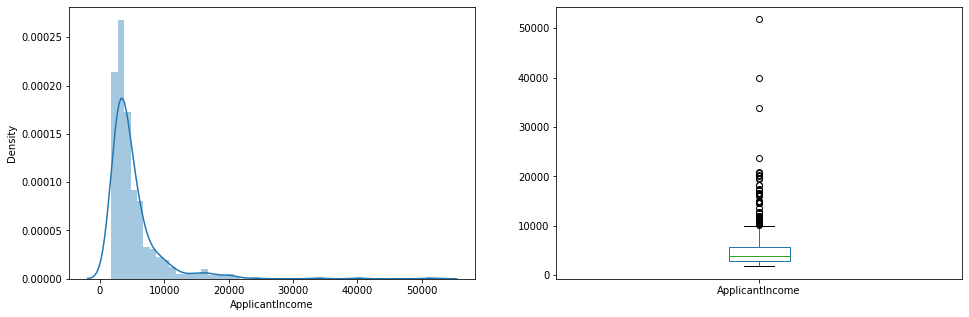

In [ ]:
plt.figure(1)
plt.subplot(121)
sns.distplot(df_train["ApplicantIncome"]);
plt.subplot(122)
df_train["ApplicantIncome"].plot.box(figsize=(16,5))
plt.show()

In [ ]:
df_train.ApplicantIncome.std()

4365.41098634447

In [ ]:
df_train.ApplicantIncome.mean()

5184.497391304348

In [ ]:
# Upper_limit = df_train.ApplicantIncome.mean()+3*df_train.ApplicantIncome.std()
# Lower_limit = df_train.ApplicantIncome.mean()-3*df_train.ApplicantIncome.std()
# Upper_limit,Lower_limit

In [ ]:
# df_train[(df_train.ApplicantIncome>Upper_limit)|(df_train.ApplicantIncome<Lower_limit)]

In [ ]:
df_train["zscore"] = (df_train.ApplicantIncome-df_train.ApplicantIncome.mean())/df_train.ApplicantIncome.std()
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Monthly_pay,monthly_pay_per_Applicant_Income,zscore
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,355.555556,6.078912,0.152220
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,355.555556,7.758140,-0.137787
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,183.333333,6.111111,-0.500410
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,333.333333,12.904891,-0.595934
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,391.666667,6.527778,0.186810


In [ ]:
df_train[df_train["zscore"]>3].shape

(11, 16)

In [ ]:
df_train[df_train["zscore"]<-3]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Monthly_pay,monthly_pay_per_Applicant_Income,zscore


In [ ]:
df_train = df_train[(df_train.zscore>-3)&(df_train.zscore<3)]

In [ ]:
df_train.shape

(564, 16)

In [ ]:
df_train = df_train.drop('zscore',axis=1)

IQR

In [ ]:
Q1 = df_train.ApplicantIncome.quantile(0.25)
Q3 = df_train.ApplicantIncome.quantile(0.75)
Q1,Q3

(2933.5, 5697.0)

In [ ]:
IQR = Q3-Q1
IQR

2763.5

In [ ]:
lower_limit = Q1-1.5*IQR
upper_limit = Q1+1.5*IQR
lower_limit, upper_limit

(-1211.75, 7078.75)

In [ ]:
df_train[(df_train.ApplicantIncome>upper_limit)|(df_train.ApplicantIncome<lower_limit)]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Monthly_pay,monthly_pay_per_Applicant_Income
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N,969.444444,7.549602
20,LP001043,Male,Yes,0,Not Graduate,No,7660,0.0,104.0,360.0,0.0,Urban,N,288.888889,3.771395
25,LP001066,Male,Yes,0,Graduate,Yes,9560,0.0,191.0,360.0,1.0,Semiurban,Y,530.555556,5.549744
34,LP001100,Male,No,3+,Graduate,No,12500,3000.0,320.0,360.0,1.0,Rural,N,888.888889,7.111111
54,LP001186,Female,Yes,1,Graduate,Yes,11500,0.0,286.0,360.0,0.0,Urban,N,794.444444,6.908213
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
594,LP002938,Male,Yes,0,Graduate,Yes,16120,0.0,260.0,360.0,1.0,Urban,Y,722.222222,4.480287
598,LP002945,Male,Yes,0,Graduate,Yes,9963,0.0,180.0,360.0,1.0,Rural,Y,500.000000,5.018569
604,LP002959,Female,Yes,1,Graduate,No,12000,0.0,496.0,360.0,1.0,Semiurban,Y,1377.777778,11.481481
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,702.777778,8.706365


In [ ]:
df_train = df_train[(df_train.ApplicantIncome>lower_limit)&(df_train.ApplicantIncome<upper_limit)]

In [ ]:
df_train.shape

(480, 15)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


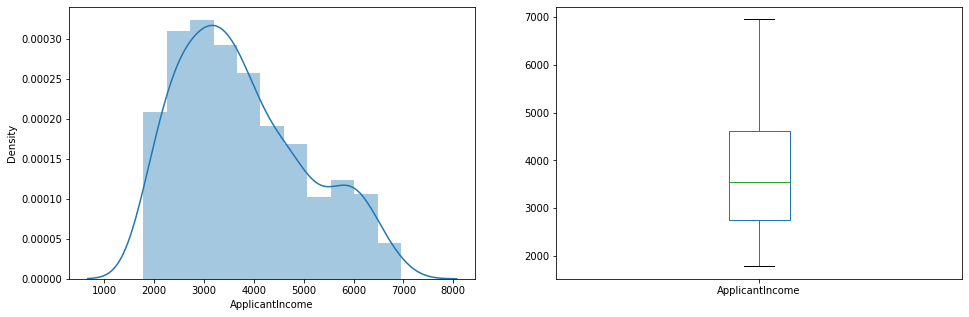

In [ ]:
plt.figure(1)
plt.subplot(121)
sns.distplot(df_train["ApplicantIncome"]);
plt.subplot(122)
df_train["ApplicantIncome"].plot.box(figsize=(16,5))
plt.show()

LoanAmount

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


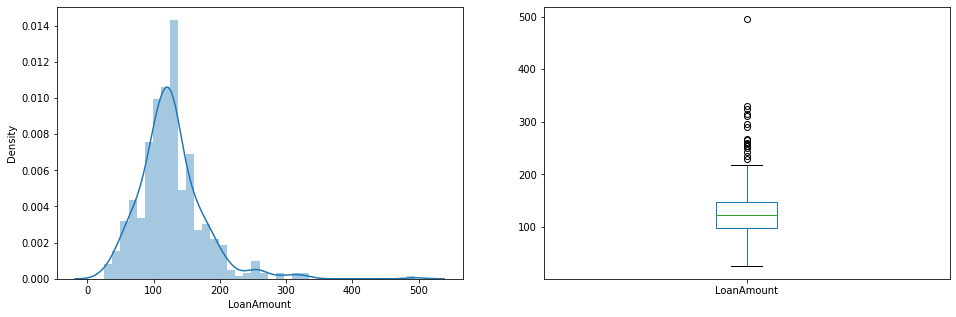

In [ ]:
plt.figure(1)
plt.subplot(121)
sns.distplot(df_train["LoanAmount"]);
plt.subplot(122)
df_train["LoanAmount"].plot.box(figsize=(16,5))
plt.show()

In [ ]:
min_thershold, max_thershold = df_train.LoanAmount.quantile([0.01,0.999])
min_thershold,max_thershold

(39.16, 415.96500000001186)

In [ ]:
df_train[df_train.LoanAmount<min_thershold]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Monthly_pay,monthly_pay_per_Applicant_Income
94,LP001325,Male,No,0,Not Graduate,No,3620,0.0,25.0,120.0,1.0,Semiurban,Y,208.333333,5.755064
133,LP001482,Male,Yes,0,Graduate,Yes,3459,0.0,25.0,120.0,1.0,Semiurban,Y,208.333333,6.022935
270,LP001888,Female,No,0,Graduate,No,3237,0.0,30.0,360.0,1.0,Urban,Y,83.333333,2.574400
555,LP002792,Male,Yes,1,Graduate,No,5468,1032.0,26.0,360.0,1.0,Semiurban,Y,72.222222,1.320816
582,LP002894,Female,Yes,0,Graduate,No,3166,0.0,36.0,360.0,1.0,Semiurban,Y,100.000000,3.158560


In [ ]:
df_train[df_train.LoanAmount>max_thershold]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Monthly_pay,monthly_pay_per_Applicant_Income
177,LP001610,Male,Yes,3+,Graduate,No,5516,11300.0,495.0,360.0,0.0,Semiurban,N,1375.0,24.927484


In [ ]:
df_train = df_train[(df_train.LoanAmount<max_thershold)&(df_train.LoanAmount>min_thershold)]

In [ ]:
df_train.shape

(474, 15)

z-score on LoanAmount:https://www.youtube.com/watch?v=KFuEAGR3HS4



/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


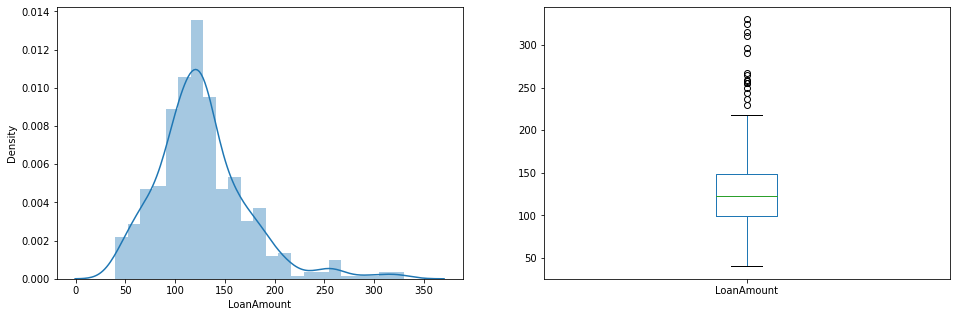

In [ ]:
plt.figure(1)
plt.subplot(121)
sns.distplot(df_train["LoanAmount"]);
plt.subplot(122)
df_train["LoanAmount"].plot.box(figsize=(16,5))
plt.show()

In [ ]:
df_train["zscore"] = (df_train.LoanAmount-df_train.LoanAmount.mean())/df_train.LoanAmount.std()
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Monthly_pay,monthly_pay_per_Applicant_Income,zscore
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,355.555556,6.078912,0.025535
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,355.555556,7.758140,0.025535
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,183.333333,6.111111,-1.316881
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,333.333333,12.904891,-0.147680
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,391.666667,6.527778,0.307009


In [ ]:
df_train[df_train["zscore"]>3].shape

(7, 16)

In [ ]:
df_train[df_train["zscore"]<-3]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Monthly_pay,monthly_pay_per_Applicant_Income,zscore


In [ ]:
df_train = df_train[(df_train.zscore>-3)&(df_train.zscore<3)]

In [ ]:
df_train.shape

(467, 16)

In [ ]:
df_train = df_train.drop('zscore',axis=1)

IQR

In [ ]:
Q1 = df_train.LoanAmount.quantile(0.25)
Q3 = df_train.LoanAmount.quantile(0.75)
Q1,Q3

(99.0, 144.0)

In [ ]:
IQR = Q3-Q1
IQR

45.0

In [ ]:
lower_limit = Q1-1.5*IQR
upper_limit = Q1+1.5*IQR
lower_limit, upper_limit

(31.5, 166.5)

In [ ]:
df_train[(df_train.LoanAmount>upper_limit)|(df_train.LoanAmount<lower_limit)]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Monthly_pay,monthly_pay_per_Applicant_Income
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y,466.666667,11.649193
12,LP001028,Male,Yes,2,Graduate,No,3073,8106.0,200.0,360.0,1.0,Urban,Y,555.555556,18.078606
30,LP001091,Male,Yes,1,Graduate,No,4166,3369.0,201.0,360.0,1.0,Urban,N,558.333333,13.402144
38,LP001114,Male,No,0,Graduate,No,4166,7210.0,184.0,360.0,1.0,Urban,Y,511.111111,12.268630
65,LP001225,Male,Yes,0,Graduate,No,5726,4595.0,258.0,360.0,1.0,Semiurban,N,716.666667,12.516009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
591,LP002931,Male,Yes,2,Graduate,Yes,6000,0.0,205.0,240.0,1.0,Semiurban,N,854.166667,14.236111
596,LP002941,Male,Yes,2,Not Graduate,Yes,6383,1000.0,187.0,360.0,1.0,Rural,N,519.444444,8.137936
599,LP002948,Male,Yes,2,Graduate,No,5780,0.0,192.0,360.0,1.0,Urban,Y,533.333333,9.227220
603,LP002958,Male,No,0,Graduate,No,3676,4301.0,172.0,360.0,1.0,Rural,Y,477.777778,12.997219


In [ ]:
df_train = df_train[(df_train.LoanAmount>lower_limit)&(df_train.LoanAmount<upper_limit)]

In [ ]:
df_train.shape

(401, 15)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


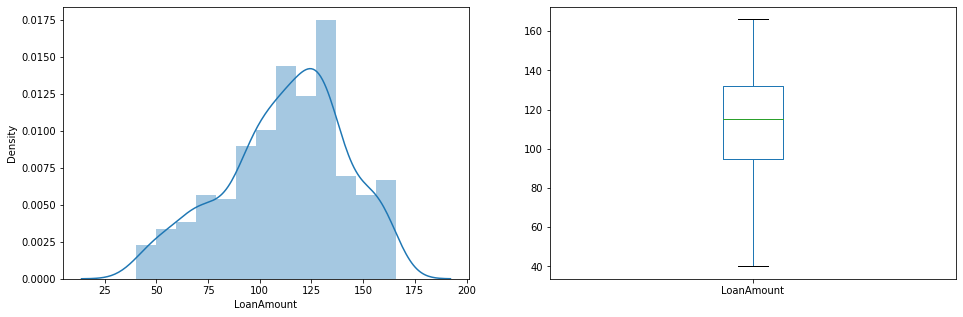

In [ ]:
plt.figure(1)
plt.subplot(121)
sns.distplot(df_train["LoanAmount"]);
plt.subplot(122)
df_train["LoanAmount"].plot.box(figsize=(16,5))
plt.show()

Log Transform:
https://towardsdatascience.com/feature-engineering-for-machine-learning-3a5e293a5114

In [ ]:
# df_train['LoanAmount'] = (df_train['LoanAmount']).transform(np.log)

In [ ]:
# plt.figure(1)
# plt.subplot(121)
# sns.distplot(df_train["LoanAmount"]);
# plt.subplot(122)
# df_train["LoanAmount"].plot.box(figsize=(16,5))
# plt.show()

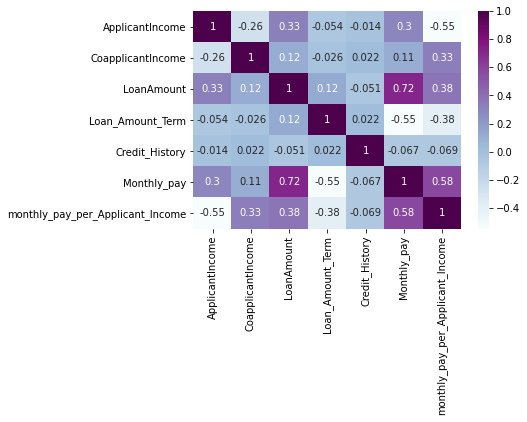

In [ ]:
matrix = df_train.corr()
sns.heatmap(matrix,cmap='BuPu',annot = True)

In [ ]:
df_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Monthly_pay,monthly_pay_per_Applicant_Income
count,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000
mean,3576.256858,1348.306534,112.274314,349.825436,0.835411,329.746814,9.885534
std,1164.069457,2304.881608,28.945372,51.480282,0.371272,109.564149,3.752022
min,1782.000000,0.000000,40.000000,180.000000,0.000000,122.222222,2.163608
25%,2666.000000,0.000000,95.000000,360.000000,1.000000,266.666667,7.144490
50%,3400.000000,1229.000000,115.000000,360.000000,1.000000,327.777778,9.013002
75%,4310.000000,2087.000000,132.000000,360.000000,1.000000,375.000000,12.037037
max,6822.000000,33837.000000,166.000000,480.000000,1.000000,872.222222,23.662939


Cramer's v-test

Gender

In [ ]:
df_train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Monthly_pay', 'monthly_pay_per_Applicant_Income'],
      dtype='object')

In [ ]:
df_train["Gender"].value_counts()

Male      320
Female     81
Name: Gender, dtype: int64

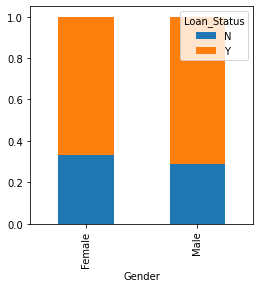

In [ ]:
Gender = pd.crosstab(df_train['Gender'],df_train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()

In [ ]:
pd.crosstab(index = df_train['Gender'], columns= df_train['Loan_Status'],margins = True)

Loan_Status,N,Y,All
Gender,,,
Female,27,54,81
Male,92,228,320
All,119,282,401


In [ ]:
gender_df_ct = pd.crosstab(index = df_train['Gender'], columns= df_train['Loan_Status'])

In [ ]:
gender_df_ct

Loan_Status,N,Y
Gender,,
Female,27,54
Male,92,228


In [ ]:
gender_df_ct.iloc[0].values

array([27, 54])

In [ ]:
(chi2,p,dof,_) = stats.chi2_contingency([gender_df_ct.iloc[0].values,gender_df_ct.iloc[1].values])

In [ ]:
print("chi2:",chi2)
print("p:",p)
print("dof:",dof)

chi2: 0.44955984655321274
p: 0.5025440503429079
dof: 1


**Married**

In [ ]:
df_train["Married"].value_counts()

Yes    244
No     157
Name: Married, dtype: int64

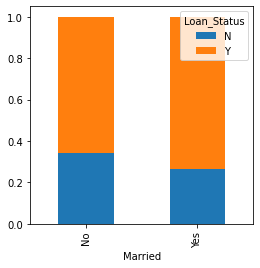

In [ ]:
Married = pd.crosstab(df_train['Married'],df_train['Loan_Status'])
Married.div(Married.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()

In [ ]:
Married_df_ct = pd.crosstab(index = df_train['Married'], columns= df_train['Loan_Status'])

In [ ]:
(chi2,p,dof,_) = stats.chi2_contingency([Married_df_ct.iloc[0].values,Married_df_ct.iloc[1].values])

In [ ]:
print("chi2:",chi2)
print("p:",p)
print("dof:",dof)

chi2: 2.3942810771132987
p: 0.1217797234284231
dof: 1


Dependents

In [ ]:
df_train["Dependents"].value_counts()

0     253
2      62
1      56
3+     30
Name: Dependents, dtype: int64

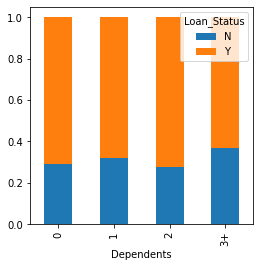

In [ ]:
Dependents = pd.crosstab(df_train['Dependents'],df_train['Loan_Status'])
Dependents.div(Dependents.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()

In [ ]:
Dependents_df_ct = pd.crosstab(index = df_train['Dependents'], columns= df_train['Loan_Status'])

In [ ]:
(chi2,p,dof,_) = stats.chi2_contingency([Dependents_df_ct.iloc[0].values,Dependents_df_ct.iloc[1].values,Dependents_df_ct.iloc[2].values,Dependents_df_ct.iloc[3].values])

In [ ]:
print("chi2:",chi2)
print("p:",p)
print("dof:",dof)

chi2: 1.0990540125557997
p: 0.7773024536532869
dof: 3


Education

In [ ]:
df_train["Education"].value_counts()

Graduate        293
Not Graduate    108
Name: Education, dtype: int64

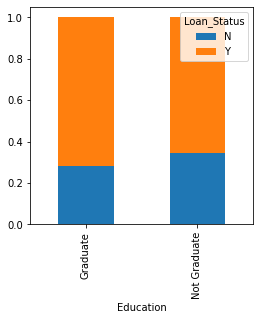

In [ ]:
Education = pd.crosstab(df_train['Education'],df_train['Loan_Status'])
Education.div(Education.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()

In [ ]:
Education_df_ct = pd.crosstab(index = df_train['Education'], columns= df_train['Loan_Status'])

In [ ]:
(chi2,p,dof,_) = stats.chi2_contingency([Education_df_ct.iloc[0].values,Education_df_ct.iloc[1].values])

In [ ]:
print("chi2:",chi2)
print("p:",p)
print("dof:",dof)

chi2: 1.2025136965268952
p: 0.2728198495892812
dof: 1


Self_Employed

In [ ]:
df_train["Self_Employed"].value_counts()

No     367
Yes     34
Name: Self_Employed, dtype: int64

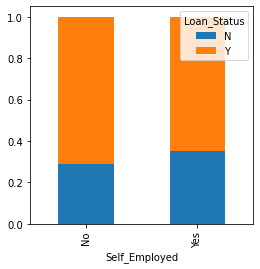

In [ ]:
Self_Employed = pd.crosstab(df_train['Self_Employed'],df_train['Loan_Status'])
Self_Employed.div(Self_Employed.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()

In [ ]:
Self_Employed_df_ct = pd.crosstab(index = df_train['Self_Employed'], columns= df_train['Loan_Status'])

In [ ]:
(chi2,p,dof,_) = stats.chi2_contingency([Self_Employed_df_ct.iloc[0].values,Self_Employed_df_ct.iloc[1].values])

In [ ]:
print("chi2:",chi2)
print("p:",p)
print("dof:",dof)

chi2: 0.30624467093552565
p: 0.5799938001351734
dof: 1


Property_Area

In [ ]:
df_train["Property_Area"].value_counts()

Semiurban    153
Urban        129
Rural        119
Name: Property_Area, dtype: int64

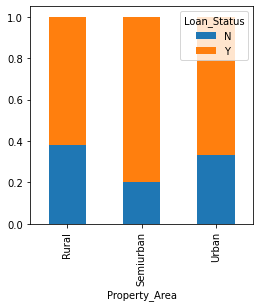

In [ ]:
Property_Area = pd.crosstab(df_train['Property_Area'],df_train['Loan_Status'])
Property_Area.div(Property_Area.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()

In [ ]:
Property_Area_df_ct = pd.crosstab(index = df_train['Property_Area'], columns= df_train['Loan_Status'])

In [ ]:
(chi2,p,dof,_) = stats.chi2_contingency([Property_Area_df_ct.iloc[0].values,Property_Area_df_ct.iloc[1].values,Property_Area_df_ct.iloc[2].values])

In [ ]:
print("chi2:",chi2)
print("p:",p)
print("dof:",dof)

chi2: 11.102309704301689
p: 0.0038829703964383304
dof: 2


In [ ]:
#Drop an Id column
df_train = df_train.drop(['Property_Area','Education','Married'],axis=1)
df_test = df_test.drop(['Property_Area','Education','Married'],axis=1)
df_train.columns

Index(['Loan_ID', 'Gender', 'Dependents', 'Self_Employed', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Loan_Status', 'Monthly_pay', 'monthly_pay_per_Applicant_Income'],
      dtype='object')

Feature Selection

Model Building

In [ ]:
#Drop an Id column
df_train = df_train.drop('Loan_ID',axis=1)
df_test = df_test.drop('Loan_ID',axis=1)
df_train.columns

Index(['Gender', 'Dependents', 'Self_Employed', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Loan_Status', 'Monthly_pay', 'monthly_pay_per_Applicant_Income'],
      dtype='object')

In [ ]:
#Spliting into X and y
X = df_train.drop('Loan_Status',1)
y = df_train['Loan_Status']

In [ ]:
#Converting catergorical varibales
X = pd.get_dummies(X)
df_test = pd.get_dummies(df_test)

In [ ]:
X.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Monthly_pay,monthly_pay_per_Applicant_Income,Gender_Female,Gender_Male,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Self_Employed_No,Self_Employed_Yes
0,5849,0.0,128.0,360.0,1.0,355.555556,6.078912,0,1,1,0,0,0,1,0
1,4583,1508.0,128.0,360.0,1.0,355.555556,7.758140,0,1,0,1,0,0,1,0
2,3000,0.0,66.0,360.0,1.0,183.333333,6.111111,0,1,1,0,0,0,0,1
3,2583,2358.0,120.0,360.0,1.0,333.333333,12.904891,0,1,1,0,0,0,1,0
4,6000,0.0,141.0,360.0,1.0,391.666667,6.527778,0,1,1,0,0,0,1,0


In [ ]:
df_test.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Self_Employed_No,Self_Employed_Yes
0,5720,0,110.0,360.0,1.0,0,1,1,0,0,0,1,0
1,3076,1500,126.0,360.0,1.0,0,1,0,1,0,0,1,0
2,5000,1800,208.0,360.0,1.0,0,1,0,0,1,0,1,0
3,2340,2546,100.0,360.0,NaN,0,1,0,0,1,0,1,0
4,3276,0,78.0,360.0,1.0,0,1,1,0,0,0,1,0


In [ ]:
#Train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2 ,stratify=y)

DecisionTreeClassifier

In [ ]:
DT_model = DecisionTreeClassifier(class_weight = 'balanced')
DT_model.fit(X_train,y_train)
y_pred = DT_model.predict(X_test)
print(accuracy_score(y_test,y_pred))    

0.7160493827160493


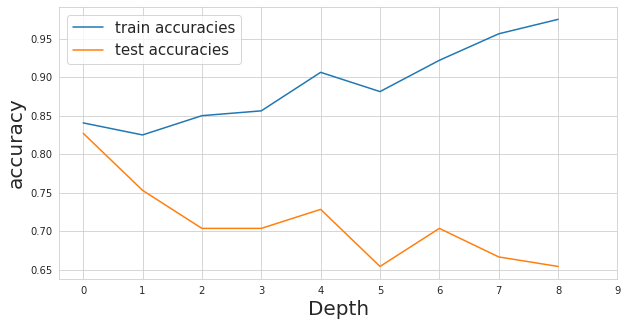

In [ ]:
#Hyper parameter optimation for DT
train_acc = []
test_acc = []
for depth in range(1,10):
    DT_model = DecisionTreeClassifier(max_depth=depth, class_weight = 'balanced')
    DT_model.fit(X_train,y_train)
    test_pred = DT_model.predict(X_test)
    train_pred = DT_model.predict(X_train)
    train_accuracy = accuracy_score(y_train,train_pred)
    test_accuracy = accuracy_score(y_test,test_pred)
    train_acc.append(train_accuracy)
    test_acc.append(test_accuracy)

plt.figure(figsize=(10,5))
sns.set_style("whitegrid")
plt.plot(train_acc,label="train accuracies")
plt.plot(test_acc,label="test accuracies")
plt.legend(loc="upper left",prop = {'size':15})
plt.xticks(range(0,10,1))
plt.xlabel('Depth',size=20)
plt.ylabel('accuracy',size=20)
plt.show()

In [ ]:
DT_model = DecisionTreeClassifier(class_weight = 'balanced')
depth = range(1,26)
param_grid = [    
    {'criterion' : ["gini", "entropy"],
    'splitter' : ["best", "random"],
     'max_depth': depth
    }
]

DT_model_cv = GridSearchCV(DT_model, param_grid, cv = 5) 

DT_model_cv.fit(X, y) 

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid=[{

In [ ]:
DT_model_cv.best_score_

0.8378703703703703

In [ ]:
DT_model_cv.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
DT_model = DT_model_cv.best_estimator_

In [ ]:
y_pred = DT_model.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.7037037037037037


Random forest

In [ ]:
RF_model = RandomForestClassifier(class_weight = 'balanced')
RF_model.fit(X_train,y_train)
y_pred = RF_model.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.8024691358024691


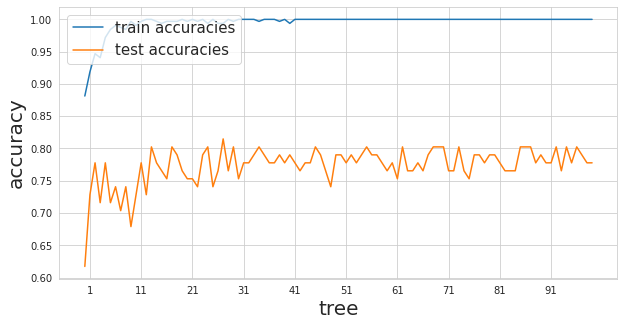

In [ ]:
#Hyper parameter optimation for RF
train_acc = []
test_acc = []
for tree in range(1,101):
    RF_model = RandomForestClassifier(n_estimators=tree, class_weight = 'balanced')
    RF_model.fit(X_train,y_train)
    test_pred = RF_model.predict(X_test)
    train_pred = RF_model.predict(X_train)
    train_accuracy = accuracy_score(y_train,train_pred)
    test_accuracy = accuracy_score(y_test,test_pred)
    train_acc.append(train_accuracy)
    test_acc.append(test_accuracy)

plt.figure(figsize=(10,5))
sns.set_style("whitegrid")
plt.plot(train_acc,label="train accuracies")
plt.plot(test_acc,label="test accuracies")
plt.legend(loc="upper left",prop = {'size':15})
plt.xticks(range(1,100,10))
plt.xlabel('tree',size=20)
plt.ylabel('accuracy',size=20)
plt.show()

In [ ]:
RF_model = RandomForestClassifier(class_weight = 'balanced')
tree = [100,200,300]
param_grid = [    
    {'criterion' : ["gini", "entropy"],
     'n_estimators' : tree
    }
]

RF_model_cv = GridSearchCV(RF_model, param_grid, cv = 5) 

RF_model_cv.fit(X, y) 

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                             

In [ ]:
RF_model_cv.best_score_

0.8304320987654321

In [ ]:
RF_model_cv.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
RF_model = RF_model_cv.best_estimator_

In [ ]:
y_pred = RF_model.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.7037037037037037


GBDT

In [ ]:
GB_model = GradientBoostingClassifier()
GB_model.fit(X_train,y_train)
y_pred = GB_model.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.8148148148148148


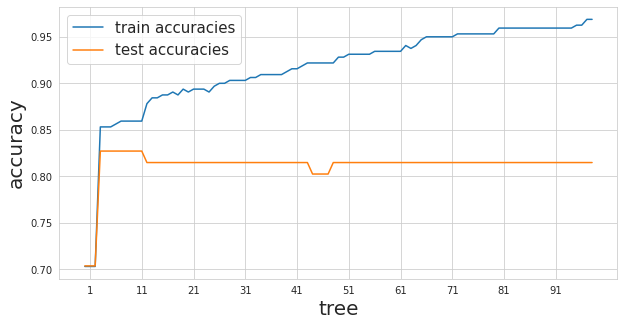

In [ ]:
#Hyper parameter optimation for GB
train_acc = []
test_acc = []
for tree in range(1,100):
    GB_model = GradientBoostingClassifier(n_estimators=tree)
    GB_model.fit(X_train,y_train)
    test_pred = GB_model.predict(X_test)
    train_pred = GB_model.predict(X_train)
    train_accuracy = accuracy_score(y_train,train_pred)
    test_accuracy = accuracy_score(y_test,test_pred)
    train_acc.append(train_accuracy)
    test_acc.append(test_accuracy)

plt.figure(figsize=(10,5))
sns.set_style("whitegrid")
plt.plot(train_acc,label="train accuracies")
plt.plot(test_acc,label="test accuracies")
plt.legend(loc="upper left",prop = {'size':15})
plt.xticks(range(1,100,10))
plt.xlabel('tree',size=20)
plt.ylabel('accuracy',size=20)
plt.show()

In [ ]:
# GB_model = GradientBoostingClassifier(n_estimators=29)
# GB_model.fit(X_train,y_train)
# y_pred = GB_model.predict(X_test)
# print(accuracy_score(y_test,y_pred))

In [ ]:
GB_model = GradientBoostingClassifier()
tree = range(1,100)
param_grid = [    
    {'learning_rate' : [0.0001,0.001,0.01,0.1],
     'n_estimators' : tree
    }
]

GB_model_cv = GridSearchCV(GB_model, param_grid, cv = 5) 

GB_model_cv.fit(X, y) 

GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
         

In [ ]:
GB_model_cv.best_score_

0.8403703703703703

In [ ]:
GB_model_cv.best_estimator_

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=7,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
GB_model = GB_model_cv.best_estimator_

In [ ]:
GB_model

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=7,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
y_pred = GB_model.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.41975308641975306


Feature scaling

In [ ]:
scalar = StandardScaler()
scalar.fit(X)
X = scalar.transform(X)

Logistic regression

In [ ]:
model = LogisticRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.8271604938271605


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
model = LogisticRegression(class_weight ='balanced')
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.7654320987654321


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
logreg = LogisticRegression() 

param_grid = [    
    {'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga']
    }
]

logreg_cv = GridSearchCV(logreg, param_grid, cv = 10) 

logreg_cv.fit(X, y) 

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': array([1.00000000e-04, 2...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
      

In [ ]:
logreg_cv.best_score_

0.8379268292682926

In [ ]:
logreg_cv.best_estimator_

LogisticRegression(C=0.004832930238571752, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

SVM

In [ ]:
# svm_model = svm.SVC()
# svm_model.fit(X_train,y_train)
# y_pred = svm_model.predict(X_test)
# print(accuracy_score(y_test,y_pred))

In [ ]:
# svm_model = svm.SVC()
# param_grid = [    
#     {'C' : [1,10,20],
#     'kernel' : ['rbf','linear']
#     }
# ]

# svm_model_cv = GridSearchCV(svm_model, param_grid, cv = 5) 

# svm_model_cv.fit(X, y) 

In [ ]:
# svm_model_cv.best_score_

In [ ]:
# svm_model_cv.best_estimator_

Naive Bias

In [ ]:
# NB_model = GaussianNB()
# NB_model.fit(X_train,y_train)
# y_pred = NB_model.predict(X_test)
# print(accuracy_score(y_test,y_pred)) 

knn Model

In [ ]:
# model = KNeighborsClassifier(n_neighbors=5)
# model.fit(X_train,y_train)
# y_pred = model.predict(X_test)
# print(accuracy_score(y_test,y_pred))

In [ ]:
# #Hyper parameter optimation for KNN
# list_of_scroes = []
# for k in range(1,51):
#     model = KNeighborsClassifier(n_neighbors=k)
#     scores = cross_val_score(model,X,y,cv=10,scoring='accuracy')
#     list_of_scroes.append(scores.mean())
# x = range(1,51)
# plt.plot(x,list_of_scroes)

In [ ]:
# #Hyper parameter optimation for KNN
# train_acc = []
# test_acc = []
# for k in range(1,51):
#     model = KNeighborsClassifier(n_neighbors=k)
#     model.fit(X_train,y_train)
#     test_pred = model.predict(X_test)
#     train_pred = model.predict(X_train)
#     train_accuracy = accuracy_score(y_train,train_pred)
#     test_accuracy = accuracy_score(y_test,test_pred)
#     train_acc.append(train_accuracy)
#     test_acc.append(test_accuracy)

# plt.figure(figsize=(10,5))
# sns.set_style("whitegrid")
# plt.plot(train_acc,label="train accuracies")
# plt.plot(test_acc,label="test accuracies")
# plt.legend(loc="upper left",prop = {'size':15})
# plt.xticks(range(0,51,5))
# plt.xlabel('k values',size=20)
# plt.ylabel('accuracy',size=20)
# plt.show()

In [ ]:
# knn_model = KNeighborsClassifier()
# k = range(1,26)
# param_grid = [    
#     {'n_neighbors' : k,
#     'weights' : ['uniform','distance'],
#      'p': [1,2]
#     }
# ]

# knn_model_cv = GridSearchCV(knn_model, param_grid, cv = 5) 

# knn_model_cv.fit(X, y) 

In [ ]:
# knn_model_cv.best_score_

In [ ]:
# knn_model_cv.best_estimator_